In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import re

In [3]:
DATA_PATH = 'Raw_Data'

In [4]:
#Prepare the data

final_df = pd.read_csv("0_final_df.csv", dtype={"id": str})

rest_list_std = []
stress_list_std = []

rest_list_HR = []
stress_list_HR = []

for i in range(len(final_df)):
    if final_df.loc[i, "condition"] == "rest":
        rest_list_std.append(final_df.loc[i, "standard deviation"])
        rest_list_HR.append(final_df.loc[i, "Calc. HR"])
    elif final_df.loc[i, "condition"] == "stress":
        stress_list_std.append(final_df.loc[i, "standard deviation"])
        stress_list_HR.append(final_df.loc[i, "Calc. HR"])





/Users/max/anaconda3/envs/bwb_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/max/anaconda3/envs/bwb_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/max/anaconda3/envs/bwb_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/max/anaconda3/envs/bwb_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Us

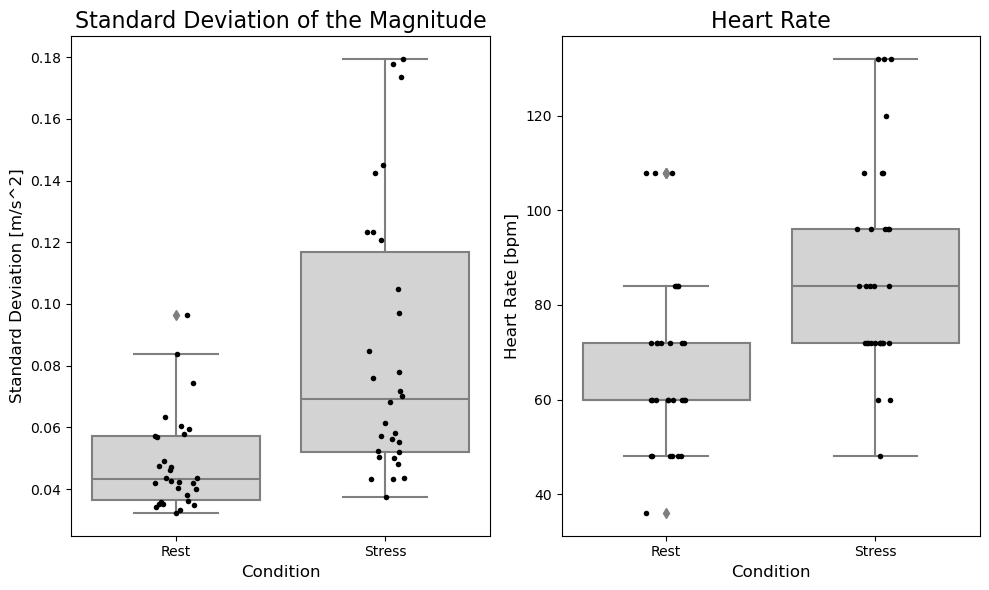

Correlation between Heart Rate and Standard Deviation:
0.7147720046382131


In [5]:
#Creating Boxplots


data_std = rest_list_std + stress_list_std
labels_std = ['Rest'] * len(rest_list_std) + ['Stress'] * len(stress_list_std)

data_HR = rest_list_HR + stress_list_HR
labels_HR = ['Rest'] * len(rest_list_HR) + ['Stress'] * len(stress_list_HR)

plt.figure(figsize=(10, 6))

# Boxplot of standard deviation
plt.subplot(1, 2, 1)
sns.boxplot(x=labels_std, y=data_std, linewidth=1.5, color='lightgray')
sns.stripplot(x=labels_std, y=data_std, color='black', size=4, alpha=1)
plt.title('Standard Deviation of the Magnitude', fontsize=16)
plt.xlabel('Condition', fontsize=12)
plt.ylabel('Standard Deviation [m/s^2]', fontsize=12)

# Boxplot of heart rate
plt.subplot(1, 2, 2)
sns.boxplot(x=labels_HR, y=data_HR, linewidth=1.5, color='lightgray')
sns.stripplot(x=labels_HR, y=data_HR, color='black', size=4, alpha=1)
plt.title('Heart Rate', fontsize=16)
plt.xlabel('Condition', fontsize=12)
plt.ylabel('Heart Rate [bpm]', fontsize=12)

plt.tight_layout()
plt.show()

# Calculate and print the correlation coefficient
correlation = pd.DataFrame({'Heart Rate': data_HR, 'Standard Deviation': data_std}).corr()
print('Correlation between Heart Rate and Standard Deviation:')
print(correlation.loc['Heart Rate', 'Standard Deviation'])


/Users/max/anaconda3/envs/bwb_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/max/anaconda3/envs/bwb_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/max/anaconda3/envs/bwb_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/max/anaconda3/envs/bwb_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

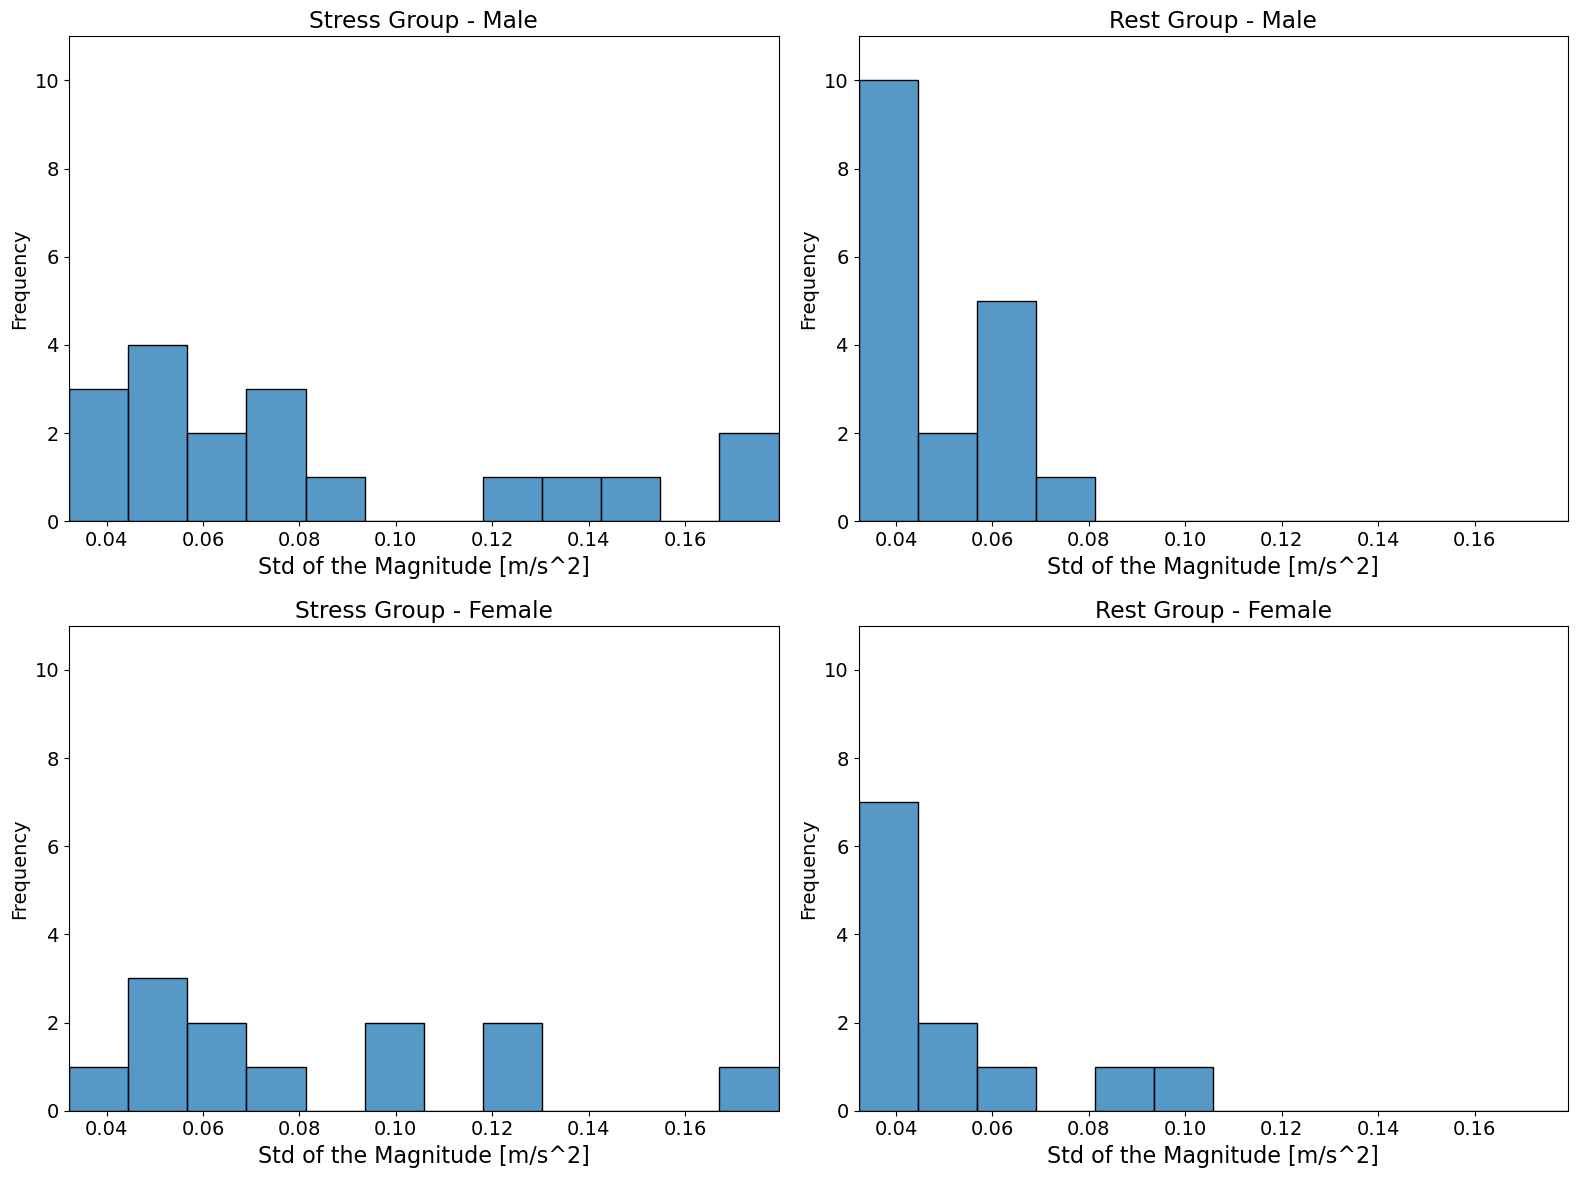

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set bigger font size for labels
plt.rcParams.update({'font.size': 14})

# Get the data for both groups and genders
stress_male = final_df[(final_df["condition"] == "stress") & (final_df["sex"] == "male")]["standard deviation"].values
stress_female = final_df[(final_df["condition"] == "stress") & (final_df["sex"] == "female")]["standard deviation"].values
rest_male = final_df[(final_df["condition"] == "rest") & (final_df["sex"] == "male")]["standard deviation"].values
rest_female = final_df[(final_df["condition"] == "rest") & (final_df["sex"] == "female")]["standard deviation"].values

# Determine the x-axis limits
x_min = min(np.min(stress_male), np.min(stress_female), np.min(rest_male), np.min(rest_female))
x_max = max(np.max(stress_male), np.max(stress_female), np.max(rest_male), np.max(rest_female))

# Calculate bin edges
bin_edges = np.linspace(x_min, x_max, num=13)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

xlabel = "Std of the Magnitude [m/s^2]"

# Plot for Stress group, Male
sns.histplot(stress_male, bins=bin_edges, ax=axes[0, 0])
axes[0, 0].set_title("Stress Group - Male")
axes[0, 0].set_xlabel(xlabel)
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].set_xlim(x_min, x_max)
axes[0, 0].set_ylim(0, 11)

# Plot for Stress group, Female
sns.histplot(stress_female, bins=bin_edges, ax=axes[1, 0])
axes[1, 0].set_title("Stress Group - Female")
axes[1, 0].set_xlabel(xlabel)
axes[1, 0].set_ylabel("Frequency")
axes[1, 0].set_xlim(x_min, x_max)
axes[1, 0].set_ylim(0, 11)

# Plot for Rest group, Male
sns.histplot(rest_male, bins=bin_edges, ax=axes[0, 1])
axes[0, 1].set_title("Rest Group - Male")
axes[0, 1].set_xlabel(xlabel)
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].set_xlim(x_min, x_max)
axes[0, 1].set_ylim(0, 11)
# Plot for Rest group, Female
sns.histplot(rest_female, bins=bin_edges, ax=axes[1, 1])
axes[1, 1].set_title("Rest Group - Female")
axes[1, 1].set_xlabel(xlabel)
axes[1, 1].set_ylabel("Frequency")
axes[1, 1].set_xlim(x_min, x_max)
axes[1, 1].set_ylim(0, 11)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Increase the font size of x-axis label
for ax in axes.flatten():
    ax.xaxis.label.set_fontsize(16)

# Display the plots
plt.tight_layout()
plt.show()


/Users/max/anaconda3/envs/bwb_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/max/anaconda3/envs/bwb_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/max/anaconda3/envs/bwb_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/max/anaconda3/envs/bwb_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

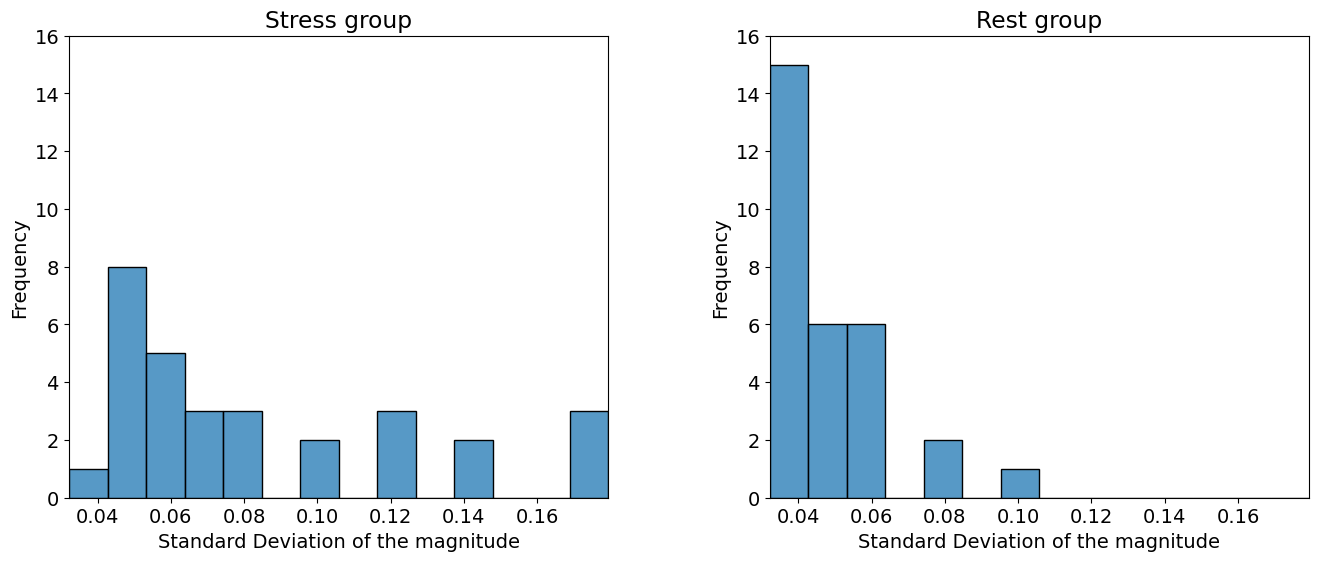

In [7]:
#Histrogram for the standard devation

# Set bigger font size for labels
plt.rcParams.update({'font.size': 14})

# Get the data for both groups
stress = final_df[final_df["condition"] == "stress"]["standard deviation"].values
rest = final_df[final_df["condition"] == "rest"]["standard deviation"].values
combined_data = np.concatenate((stress, rest))

# Determine the x-axis limits
x_min = np.min(combined_data)
x_max = np.max(combined_data)

bin_edges1 = np.linspace(x_min, x_max, num=15)


# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for Stress group
sns.histplot(stress, bins=bin_edges1, ax=axes[0])
axes[0].set_title("Stress group")
axes[0].set_xlabel("Standard Deviation of the magnitude")
axes[0].set_ylabel("Frequency")
axes[0].set_ylim(0, 16)
axes[0].set_xlim(x_min, x_max)

# Plot for Rest group
sns.histplot(rest, bins=bin_edges1, ax=axes[1])
axes[1].set_title("Rest group")
axes[1].set_xlabel("Standard Deviation of the magnitude")
axes[1].set_ylabel("Frequency")
axes[1].set_ylim(0,16) # hard coded
axes[1].set_xlim(x_min, x_max)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Display the plots
plt.show()


/Users/max/anaconda3/envs/bwb_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/max/anaconda3/envs/bwb_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/max/anaconda3/envs/bwb_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/max/anaconda3/envs/bwb_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

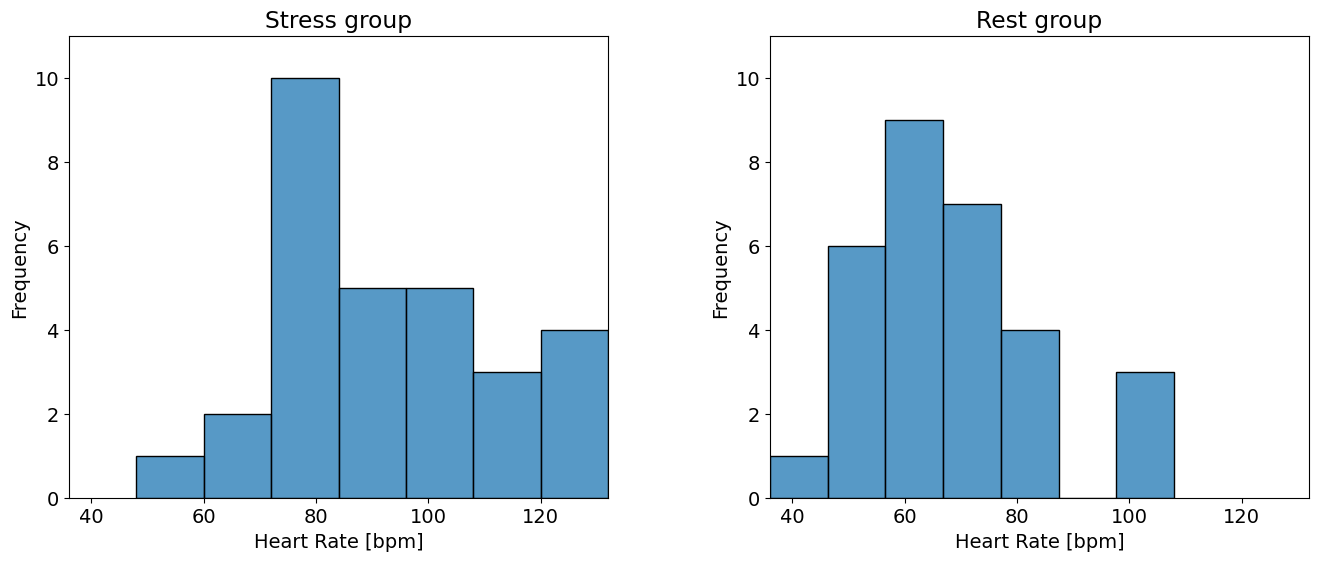

In [8]:
#Boxplots for the heart rate

# Set bigger font size for labels
plt.rcParams.update({'font.size': 14})

# Get the data for both groups
stress_hr = final_df[final_df["condition"] == "stress"]["Calc. HR"].values
rest_hr = final_df[final_df["condition"] == "rest"]["Calc. HR"].values
combined_data_hr = np.concatenate((stress_hr, rest_hr))

# Determine the x-axis limits
x_min_hr = np.min(combined_data_hr)
x_max_hr = np.max(combined_data_hr)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for Stress group
sns.histplot(stress_hr, bins=7, ax=axes[0])
axes[0].set_title("Stress group")
axes[0].set_xlabel("Heart Rate [bpm]")
axes[0].set_ylabel("Frequency")
axes[0].set_ylim(0,11) # hard coded
axes[0].set_xlim(x_min_hr, x_max_hr)

# Plot for Rest group
sns.histplot(rest_hr, bins=7, ax=axes[1])
axes[1].set_title("Rest group")
axes[1].set_xlabel("Heart Rate [bpm]")
axes[1].set_ylabel("Frequency")
axes[1].set_ylim(0,11) # hard coded
axes[1].set_xlim(x_min_hr, x_max_hr)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Display the plots
plt.show()


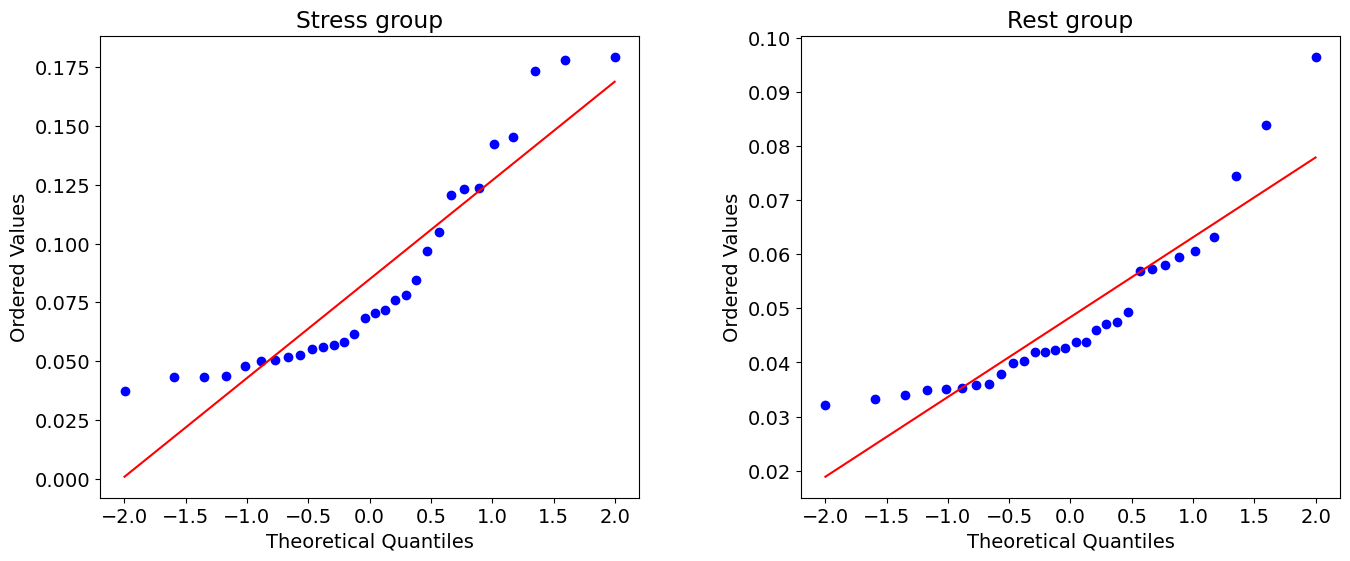

In [9]:
#QQPlot

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set bigger font size for labels
plt.rcParams.update({'font.size': 14})

# Get the data for both groups
stress = final_df[final_df["condition"] == "stress"]["standard deviation"].values
rest = final_df[final_df["condition"] == "rest"]["standard deviation"].values

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot QQ plot for Stress group
stats.probplot(stress, plot=axes[0])
axes[0].set_title("Stress group")
axes[0].set_xlabel("Theoretical Quantiles")
axes[0].set_ylabel("Ordered Values")

# Plot QQ plot for Rest group
stats.probplot(rest, plot=axes[1])
axes[1].set_title("Rest group")
axes[1].set_xlabel("Theoretical Quantiles")
axes[1].set_ylabel("Ordered Values")

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Display the plots
plt.show()


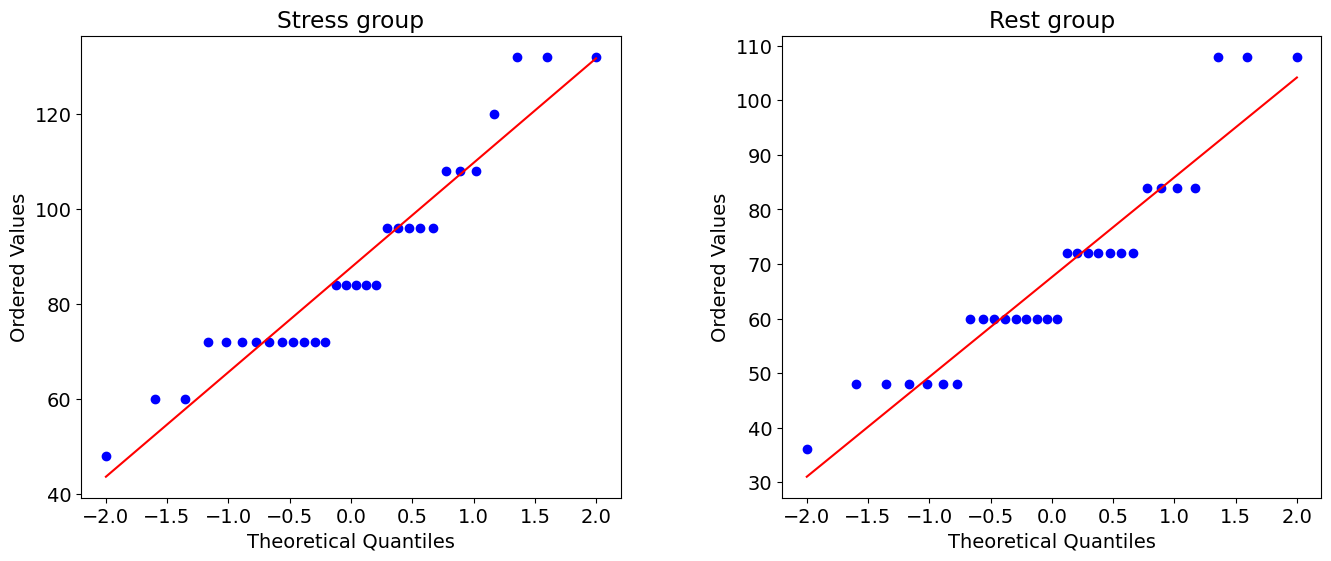

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set bigger font size for labels
plt.rcParams.update({'font.size': 14})

# Get the data for both groups
stress_hr = final_df[final_df["condition"] == "stress"]["Calc. HR"].values
rest_hr = final_df[final_df["condition"] == "rest"]["Calc. HR"].values

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot QQ plot for Stress group
stats.probplot(stress_hr, plot=axes[0])
axes[0].set_title("Stress group")
axes[0].set_xlabel("Theoretical Quantiles")
axes[0].set_ylabel("Ordered Values")

# Plot QQ plot for Rest group
stats.probplot(rest_hr, plot=axes[1])
axes[1].set_title("Rest group")
axes[1].set_xlabel("Theoretical Quantiles")
axes[1].set_ylabel("Ordered Values")

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Display the plots
plt.show()


In [11]:
#Descriptive Statistics

numeric_columns = ['standard deviation', 'num_peaks', 'Calc. HR', 'age', 'weight']

# Calculate descriptive statistics
descriptive_stats = final_df[numeric_columns].describe()

# Define the output file path
output_file_path = 'descriptive_stats.txt'

# Export the descriptive statistics as a .txt file
descriptive_stats.to_csv(output_file_path, sep='\t', float_format='%.2f')